In [12]:
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pydicom import dcmread
import os

In [41]:
path_imagen = r'In_Breast_2012\AllDICOMs\20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm'

ds = dcmread(path_imagen)

In [44]:


imagen = dcmread(path_imagen).pixel_array
copy_img = imagen.copy()
flip = False
if os.path.basename(path_imagen).split('_')[3] == 'R':
    imagen = cv2.flip(imagen,1)
    flip = True
_,img_bin = cv2.threshold(copy_img, 0.0,255.0,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cnts,hierarchy = cv2.findContours(img_bin.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


print(len(cnts))
print(hierarchy)

x,y,w,h = cv2.boundingRect(cnts[1])

print(imagen.shape)

print(f'x: {x}')
print(f'y: {y}')
print(f'w: {w}')
print(f'h: {h}')

#roi_img = imagen[y:y+h+1, x:x+w+1]

roi_img = imagen[y:y+w+1, x:x+w+1]

# borderType = cv2.BORDER_CONSTANT
# top = int(0.1 * roi_img.shape[0])  # imagen[0] = rows
# bottom = top
# left = int(0.1 * roi_img.shape[1])  # imagen[1] = cols
# right = left
# roi_img = cv2.copyMakeBorder(roi_img, top, bottom, left, right, borderType, None, value=0.0)

print(roi_img.shape)

if flip:
    roi_img = cv2.flip(roi_img,1)
    flip = False


2
[[[ 1 -1 -1 -1]
  [-1  0 -1 -1]]]
(4084, 3328)
x: 1376
y: 65
w: 1952
h: 3462
(1953, 1952)


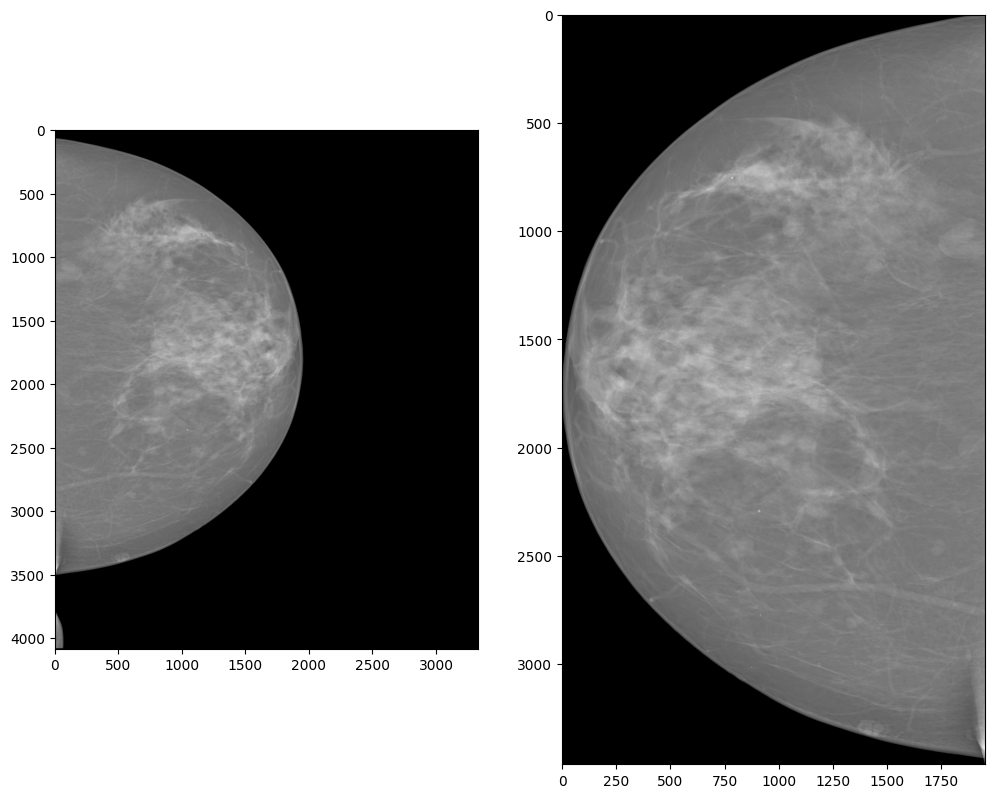

In [38]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(imagen, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(roi_img, cmap='gray')

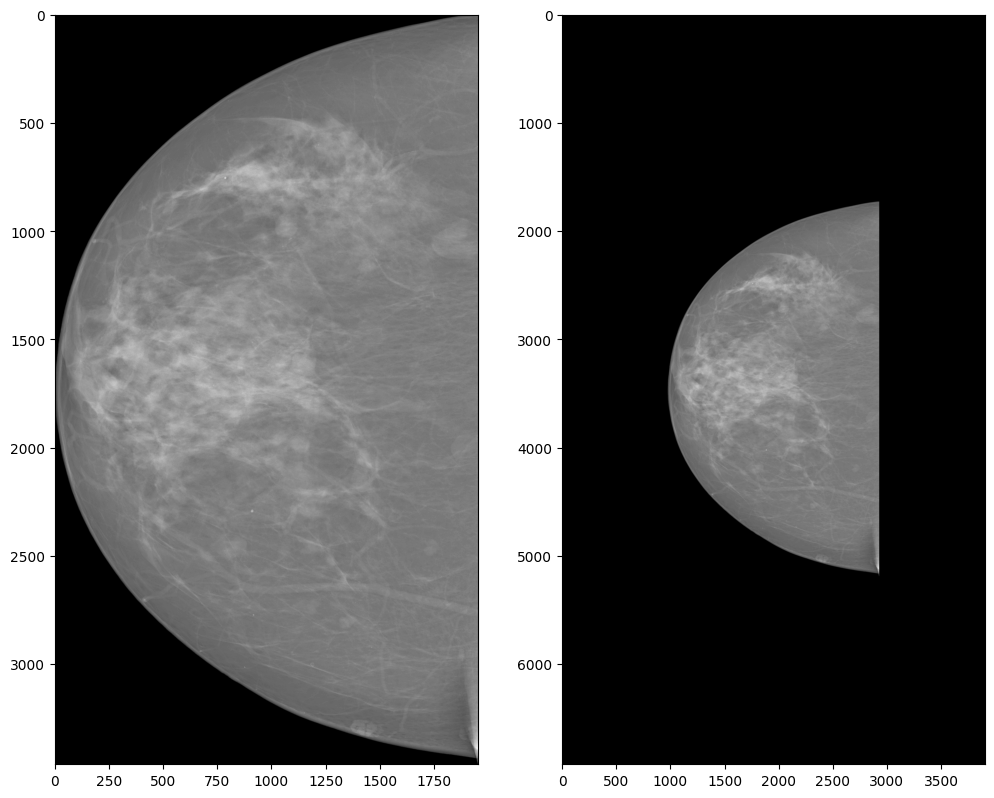

In [39]:
def centrar_imagen(imagen, nuevo_ancho, nuevo_alto):
    # Leer la imagen
    #img = dcmread(imagen).pixel_array

    img = imagen

    # Obtener las dimensiones de la imagen original
    alto_original, ancho_original = img.shape

    # Calcular las coordenadas para centrar la imagen
    x = (nuevo_ancho - ancho_original) // 2
    y = (nuevo_alto - alto_original) // 2

    # Definir la matriz de transformación de afinidad para centrar la imagen
    matriz_transformacion = np.float32([[1, 0, x], [0, 1, y]])

    # Aplicar la transformación de afinidad
    imagen_centrada = cv2.warpAffine(img, matriz_transformacion, (nuevo_ancho, nuevo_alto))

    # Guardar la imagen centrada
    plt.figure(figsize=(12,12))
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(imagen_centrada, cmap='gray')

# Ejemplo de uso
    
nuevo_alto, nuevo_ancho = roi_img.shape
centrar_imagen(roi_img, nuevo_ancho*2,nuevo_alto*2)